In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Set the random seed for reproducibility
np.random.seed(42)

In [11]:
# Create sample dataset with outliers
df = pd.DataFrame({
    'height': np.concatenate([
        np.random.normal(175, 7, 95),  # Normal heights in cm
        np.array([150, 155, 200, 205, 210])  # Outliers
    ]),
    'weight': np.concatenate([
        np.random.normal(70, 10, 95),  # Normal weights in kg
        np.array([40, 45, 120, 125, 130])  # Outliers
    ]),
    'salary': np.concatenate([
        np.random.lognormal(10.5, 0.4, 95),  # Normal salaries
        np.array([500000, 520000, 550000, 600000, 1000000])  # Outliers
    ])
})


In [12]:
# Display dataset head and basic statistics
df.head()

,height,weight,salary
0,171.004776,67.587639,51712.973907
1,169.173511,73.520554,47142.450159
2,178.299909,57.484606,19330.571500
3,171.134439,84.437646,65553.123578
4,179.430523,69.178488,63072.273210


In [13]:
# Quick data summary
df.describe()


,height,weight,salary
count,100.000000,100.000000,100.000000
mean,176.746580,72.479366,71414.286107
std,8.940440,13.841385,137160.140891
min,150.000000,40.000000,11401.473139
25%,171.246549,65.032768,31586.294740
50%,176.477257,71.970604,41566.775509
75%,180.834332,77.995110,53576.638259
max,210.000000,130.000000,1000000.000000


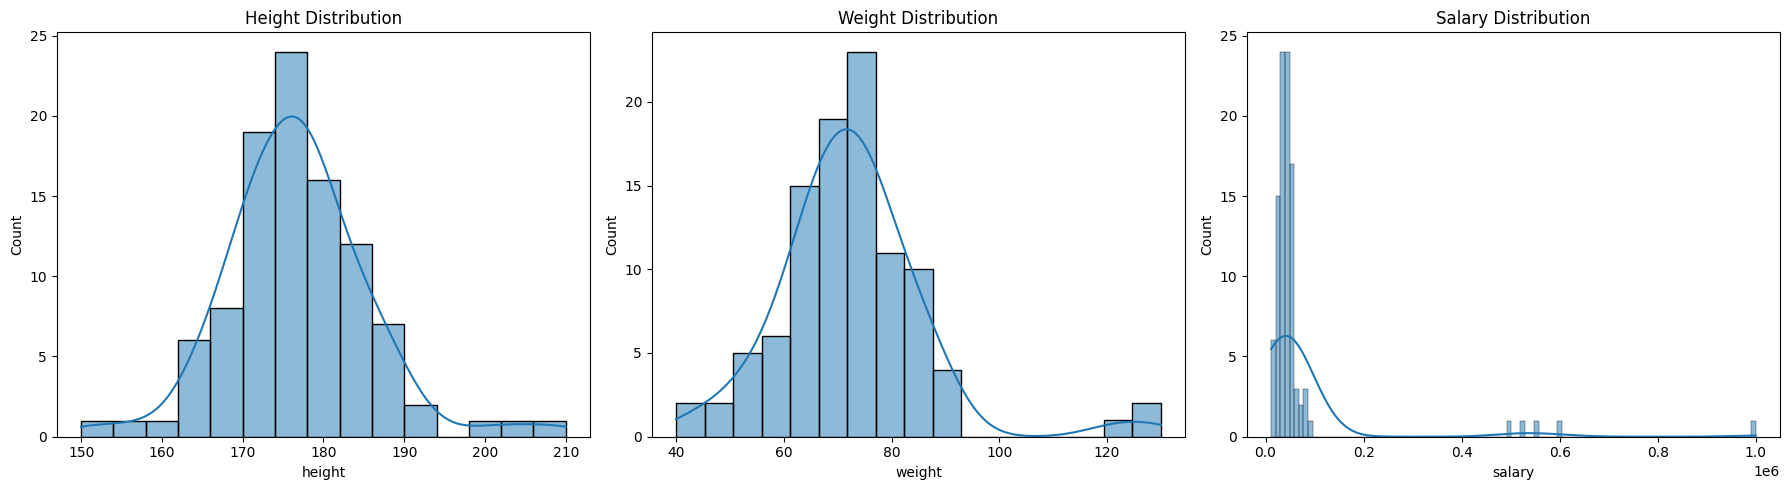

In [14]:
# Visualize distributions to identify potential outliers
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['height'], kde=True)
plt.title('Height Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['weight'], kde=True)
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['salary'], kde=True)
plt.title('Salary Distribution')

plt.tight_layout()
plt.show()

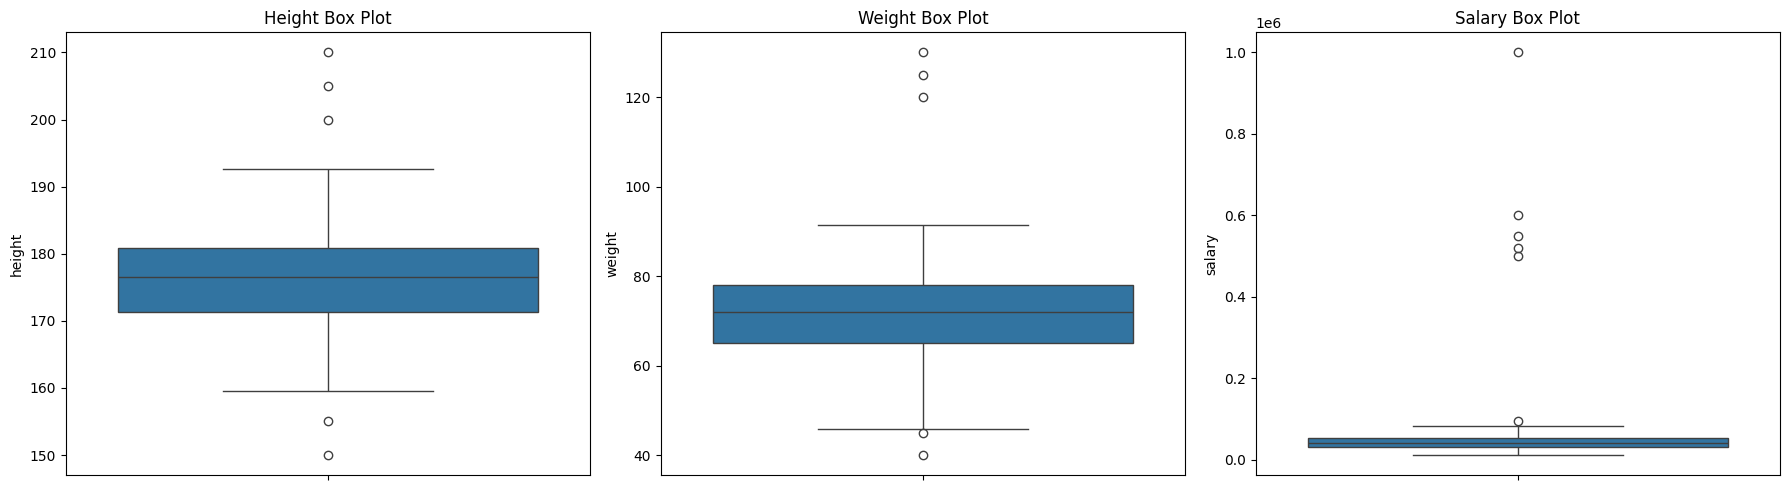

In [15]:
# Box plots to visualize potential outliers
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['height'])
plt.title('Height Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['weight'])
plt.title('Weight Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['salary'])
plt.title('Salary Box Plot')

plt.tight_layout()
plt.show()

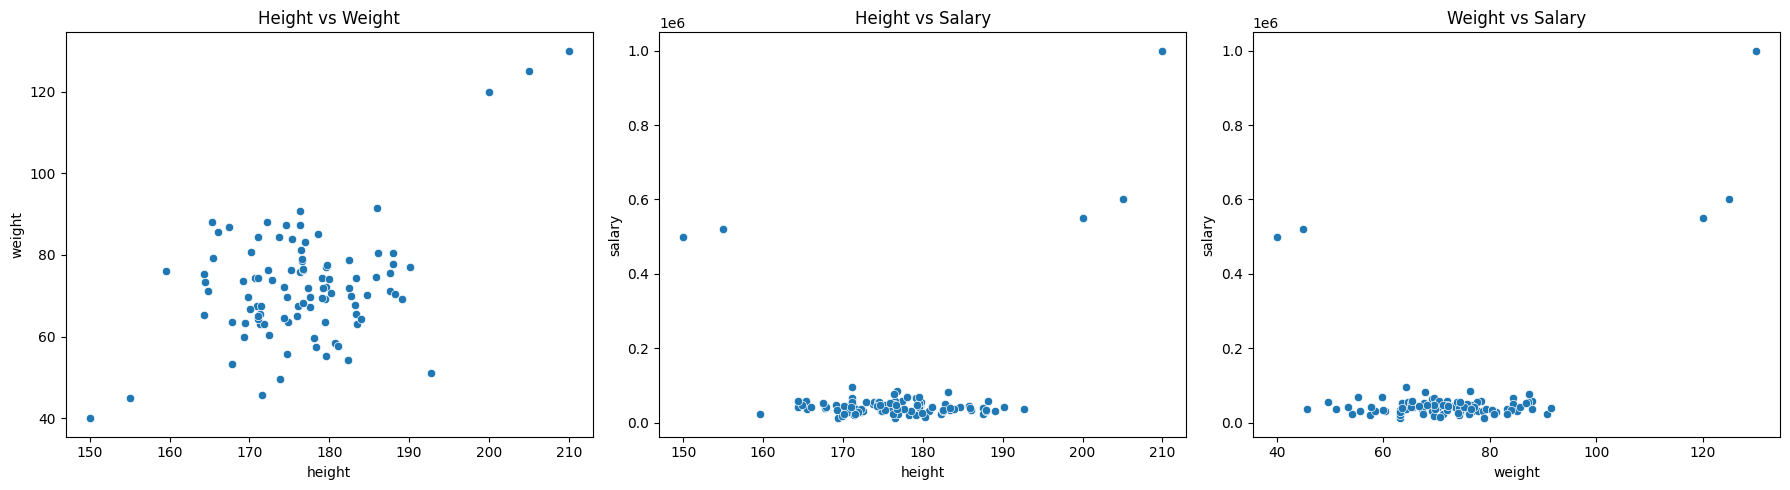

In [17]:
# Scatter plots to identify patterns and potential outliers
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='height', y='weight', data=df)
plt.title('Height vs Weight')

plt.subplot(1, 3, 2)
sns.scatterplot(x='height', y='salary', data=df)
plt.title('Height vs Salary')

plt.subplot(1, 3, 3)
sns.scatterplot(x='weight', y='salary', data=df)
plt.title('Weight vs Salary')

plt.tight_layout()
plt.show()


In [18]:
# Define function for Z-score outlier detection
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using Z-score method
    Returns indices of outliers
    """
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]


In [19]:
# Apply Z-score outlier detection
height_outliers_z = detect_outliers_zscore(df['height'])
weight_outliers_z = detect_outliers_zscore(df['weight'])
salary_outliers_z = detect_outliers_zscore(df['salary'])

print(f"Height outliers (Z-score): {len(height_outliers_z)} found at indices {height_outliers_z}")
print(f"Weight outliers (Z-score): {len(weight_outliers_z)} found at indices {weight_outliers_z}")
print(f"Salary outliers (Z-score): {len(salary_outliers_z)} found at indices {salary_outliers_z}")


Height outliers (Z-score): 3 found at indices [95 98 99]
Weight outliers (Z-score): 3 found at indices [97 98 99]
Salary outliers (Z-score): 5 found at indices [95 96 97 98 99]


In [22]:
# Define function for IQR outlier detection
def detect_outliers_iqr(data, factor=1.5):
    """
    Detect outliers using IQR method
    Returns indices of outliers
    """
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (factor * iqr)
    upper_bound = q3 + (factor * iqr)
    return np.where((data < lower_bound) | (data > upper_bound))[0]


In [23]:
# Apply IQR outlier detection
height_outliers_iqr = detect_outliers_iqr(df['height'])
weight_outliers_iqr = detect_outliers_iqr(df['weight'])
salary_outliers_iqr = detect_outliers_iqr(df['salary'])

print(f"Height outliers (IQR): {len(height_outliers_iqr)} found at indices {height_outliers_iqr}")
print(f"Weight outliers (IQR): {len(weight_outliers_iqr)} found at indices {weight_outliers_iqr}")
print(f"Salary outliers (IQR): {len(salary_outliers_iqr)} found at indices {salary_outliers_iqr}")


Height outliers (IQR): 5 found at indices [95 96 97 98 99]
Weight outliers (IQR): 5 found at indices [95 96 97 98 99]
Salary outliers (IQR): 6 found at indices [71 95 96 97 98 99]


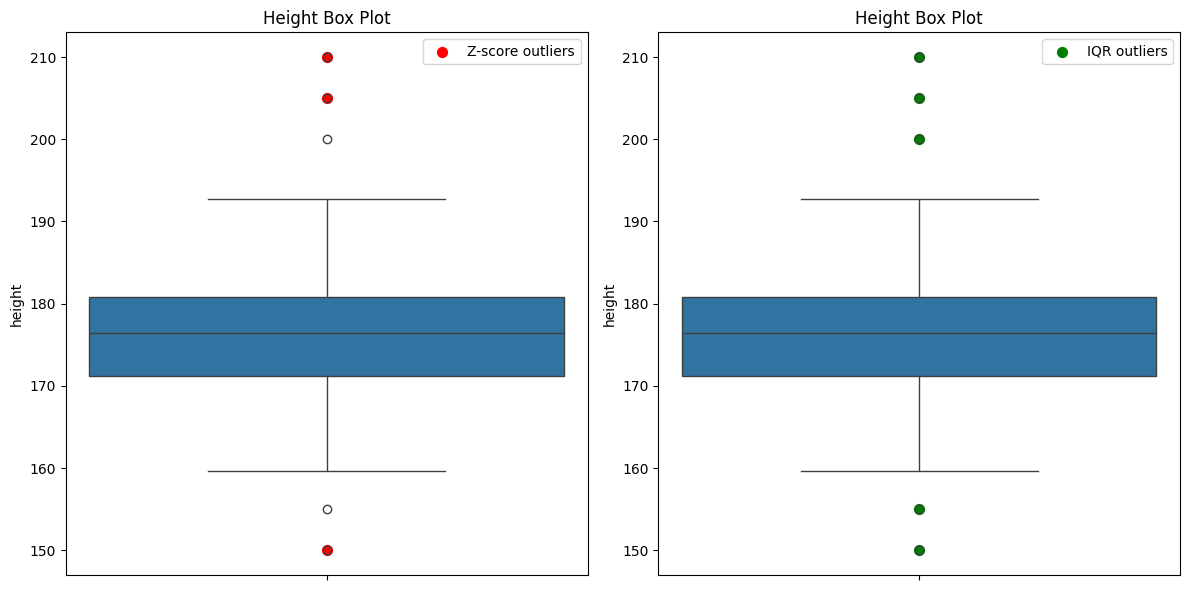

In [24]:
# Visualize the detected outliers for height using box plot with highlighted outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['height'])
plt.title('Height Box Plot')
plt.scatter(np.zeros_like(height_outliers_z), df['height'].iloc[height_outliers_z],
            color='red', s=50, label='Z-score outliers')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(y=df['height'])
plt.title('Height Box Plot')
plt.scatter(np.zeros_like(height_outliers_iqr), df['height'].iloc[height_outliers_iqr],
            color='green', s=50, label='IQR outliers')
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
# Examining the impact of outliers on statistical measures
print("With outliers:")
print(f"Height mean: {df['height'].mean():.2f}, std: {df['height'].std():.2f}")
print(f"Weight mean: {df['weight'].mean():.2f}, std: {df['weight'].std():.2f}")
print(f"Salary mean: {df['salary'].mean():.2f}, std: {df['salary'].std():.2f}")


With outliers:
Height mean: 176.75, std: 8.94
Weight mean: 72.48, std: 13.84
Salary mean: 71414.29, std: 137160.14


In [26]:
# Create copies without outliers (using IQR method)
df_no_outliers = df.copy()
all_outliers = list(set(height_outliers_iqr) | set(weight_outliers_iqr) | set(salary_outliers_iqr))
df_no_outliers = df_no_outliers.drop(all_outliers).reset_index(drop=True)

print("\nWithout outliers:")
print(f"Height mean: {df_no_outliers['height'].mean():.2f}, std: {df_no_outliers['height'].std():.2f}")
print(f"Weight mean: {df_no_outliers['weight'].mean():.2f}, std: {df_no_outliers['weight'].std():.2f}")
print(f"Salary mean: {df_no_outliers['salary'].mean():.2f}, std: {df_no_outliers['salary'].std():.2f}")



Without outliers:
Height mean: 176.42, std: 6.75
Weight mean: 71.53, std: 9.66
Salary mean: 41238.87, std: 14917.97


In [27]:
# Handling outliers using different approaches
# 1. Removal (already done above)
# 2. Capping (Winsorization)
def winsorize(data, limits=(0.05, 0.05)):
    """Apply winsorization to limit extreme values"""
    lower_limit = np.percentile(data, limits[0] * 100)
    upper_limit = np.percentile(data, 100 - limits[1] * 100)
    return np.clip(data, lower_limit, upper_limit)

df_winsorized = df.copy()
df_winsorized['height'] = winsorize(df['height'])
df_winsorized['weight'] = winsorize(df['weight'])
df_winsorized['salary'] = winsorize(df['salary'])


In [28]:
# 3. Log transformation (especially useful for skewed data like salary)
df_log = df.copy()
df_log['salary'] = np.log(df['salary'])


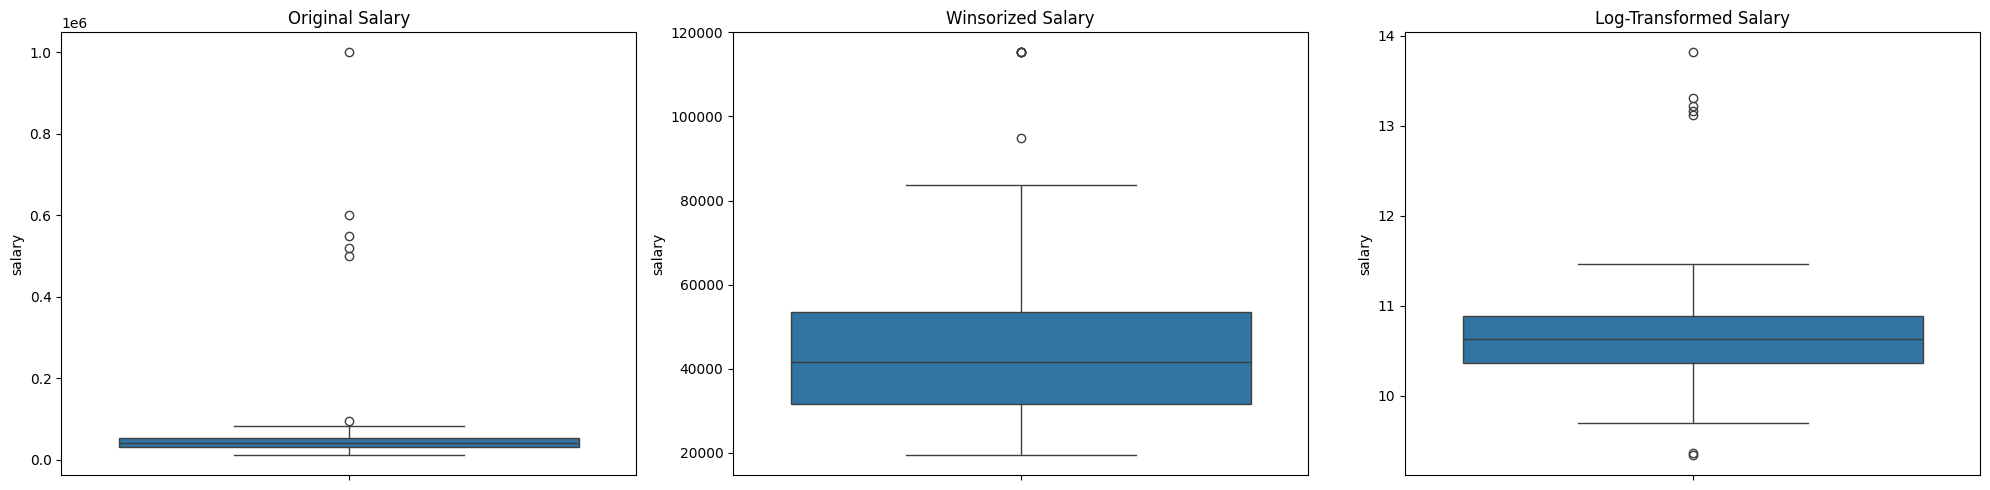

In [29]:
# Compare the distributions before and after transformation
plt.figure(figsize=(20, 5))

# Original distributions
plt.subplot(1, 3, 1)
sns.boxplot(y=df['salary'])
plt.title('Original Salary')

# After winsorization
plt.subplot(1, 3, 2)
sns.boxplot(y=df_winsorized['salary'])
plt.title('Winsorized Salary')

# After log transformation
plt.subplot(1, 3, 3)
sns.boxplot(y=df_log['salary'])
plt.title('Log-Transformed Salary')

plt.tight_layout()
plt.show()

In [30]:
# Feature associations and correlation analysis
# Calculate correlation matrix
corr_matrix = df.corr()


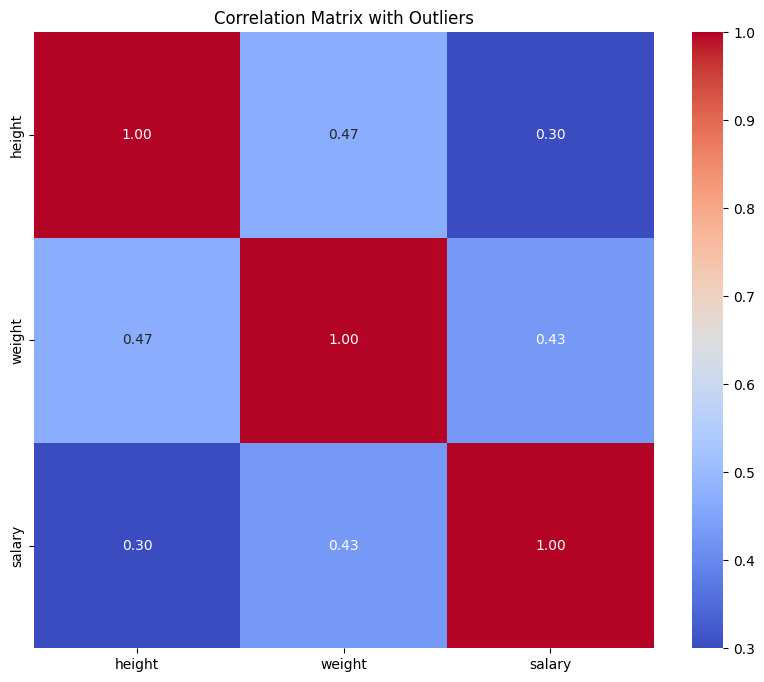

In [31]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Outliers')
plt.show()


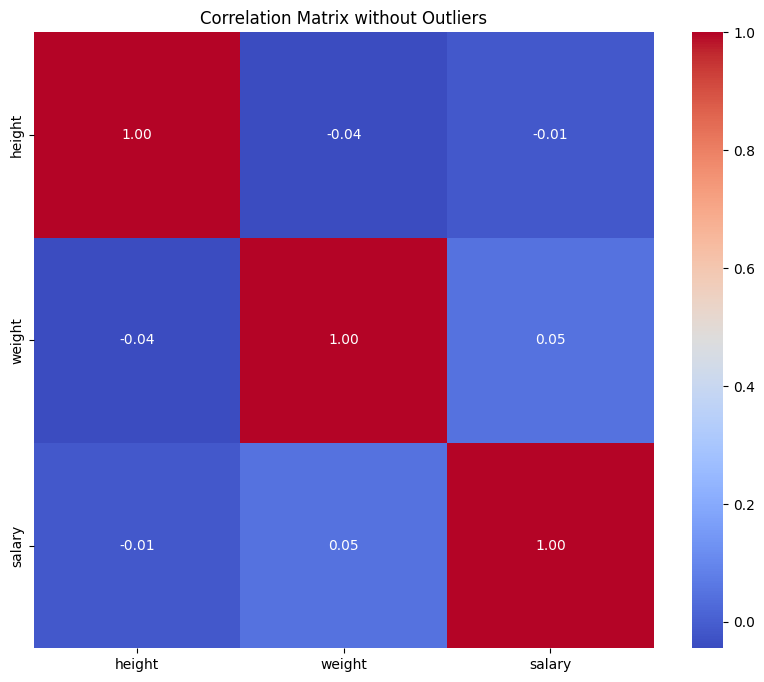

In [32]:
# Compare with correlation after removing outliers
corr_matrix_no_outliers = df_no_outliers.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_no_outliers, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix without Outliers')
plt.show()


In [33]:
# Create function to profile features and detect potential issues
def profile_feature(data, feature_name):
    """Create a basic profile of a numeric feature"""
    feature = data[feature_name]

    # Basic statistics
    stats_dict = {
        'Count': len(feature),
        'Mean': feature.mean(),
        'Median': feature.median(),
        'Std Dev': feature.std(),
        'Min': feature.min(),
        'Max': feature.max(),
        'Range': feature.max() - feature.min(),
        'IQR': np.percentile(feature, 75) - np.percentile(feature, 25),
        'Skewness': stats.skew(feature),
        'Kurtosis': stats.kurtosis(feature),
        'Missing Values': feature.isna().sum(),
        'Missing %': feature.isna().mean() * 100
    }

    # Z-score outliers
    z_outliers = detect_outliers_zscore(feature)
    stats_dict['Z-score Outliers'] = len(z_outliers)
    stats_dict['Z-score Outlier %'] = len(z_outliers) / len(feature) * 100

    # IQR outliers
    iqr_outliers = detect_outliers_iqr(feature)
    stats_dict['IQR Outliers'] = len(iqr_outliers)
    stats_dict['IQR Outlier %'] = len(iqr_outliers) / len(feature) * 100

    return pd.Series(stats_dict, name=feature_name)


In [34]:
# Apply feature profiling to the dataset
profile_results = pd.DataFrame([
    profile_feature(df, 'height'),
    profile_feature(df, 'weight'),
    profile_feature(df, 'salary')
])

# Display the feature profiles
profile_results


,Count,Mean,Median,Std Dev,Min,Max,Range,IQR,Skewness,Kurtosis,Missing Values,Missing %,Z-score Outliers,Z-score Outlier %,IQR Outliers,IQR Outlier %
height,100.0,176.746580,176.477257,8.940440,150.000000,210.0,60.000000,9.587783,0.567535,2.421989,0.0,0.0,3.0,3.0,5.0,5.0
weight,100.0,72.479366,71.970604,13.841385,40.000000,130.0,90.000000,12.962342,1.318718,4.699847,0.0,0.0,3.0,3.0,5.0,5.0
salary,100.0,71414.286107,41566.775509,137160.140891,11401.473139,1000000.0,988598.526861,21990.343519,4.810462,24.342416,0.0,0.0,5.0,5.0,6.0,6.0


In [35]:
# Fixed function for multivariate outlier detection
def detect_multivariate_outliers(data, method='mahalanobis', threshold=0.99):
    """
    Detect multivariate outliers using Mahalanobis distance
    Returns indices of outliers
    """
    if method == 'mahalanobis':
        # Calculate Mahalanobis distance
        x = data.values
        covariance_matrix = np.cov(x, rowvar=False)
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        mean_vector = np.mean(x, axis=0)

        # Implement mahalanobis distance manually
        mahalanobis_dist = []
        for i in range(x.shape[0]):
            x_i = x[i, :]
            # Calculate mahalanobis distance: (x-μ)ᵀΣ⁻¹(x-μ)
            diff = x_i - mean_vector
            mahal = np.sqrt(diff.dot(inv_covariance_matrix).dot(diff.T))
            mahalanobis_dist.append(mahal)

        # Convert to array
        mahalanobis_dist = np.array(mahalanobis_dist)

        # Find threshold using chi-squared distribution
        threshold_value = stats.chi2.ppf(threshold, df=x.shape[1])

        # Return indices of outliers
        return np.where(mahalanobis_dist > threshold_value)[0]
    else:
        raise ValueError("Only 'mahalanobis' method is currently supported")


In [36]:
# Apply multivariate outlier detection
multivariate_outliers = detect_multivariate_outliers(df, threshold=0.95)
print(f"Multivariate outliers: {len(multivariate_outliers)} found at indices {multivariate_outliers}")


Multivariate outliers: 0 found at indices []


<Figure size 1200x1000 with 0 Axes>

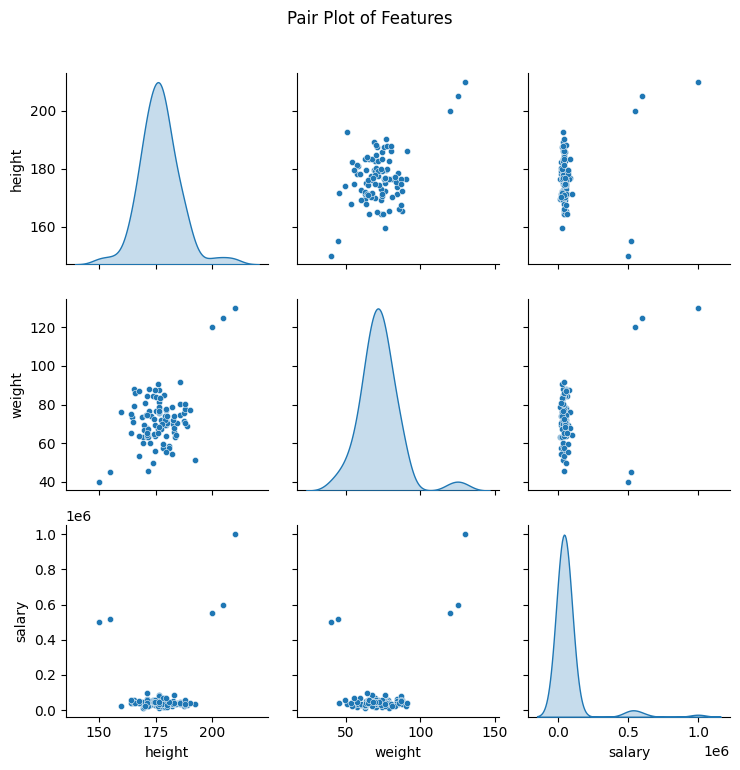

In [37]:
# Visualize the multivariate outliers in a pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(df, diag_kind='kde', plot_kws={"s": 20})
plt.suptitle('Pair Plot of Features', y=1.02)
plt.tight_layout()
plt.show()

<ipython-input-38-dfe64762098f>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


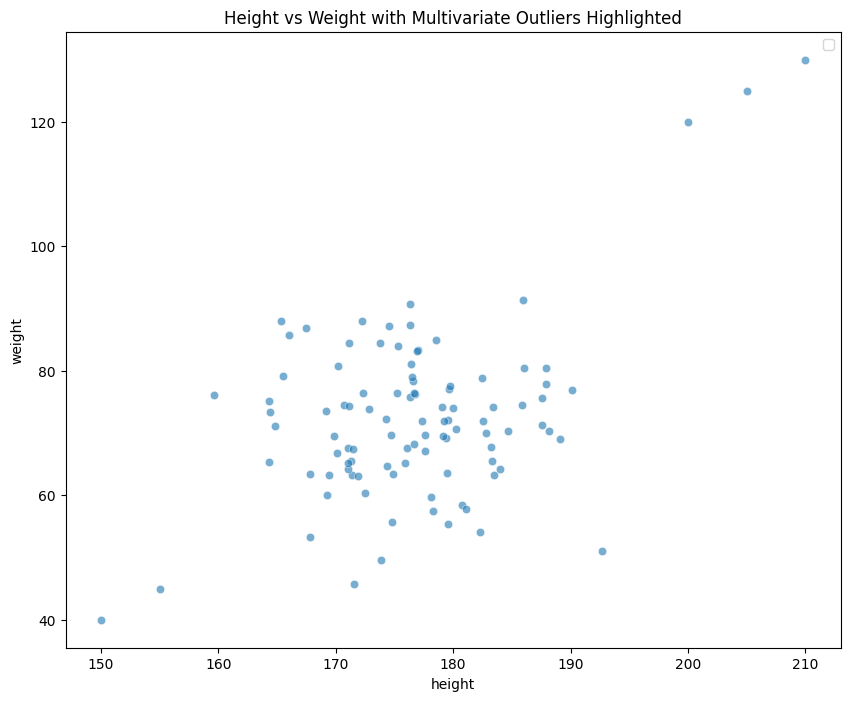

In [38]:
# Highlight the multivariate outliers in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='height', y='weight', data=df, alpha=0.6)
sns.scatterplot(x='height', y='weight', data=df.iloc[multivariate_outliers],
                color='red', s=100, label='Multivariate Outliers')
plt.title('Height vs Weight with Multivariate Outliers Highlighted')
plt.legend()
plt.show()


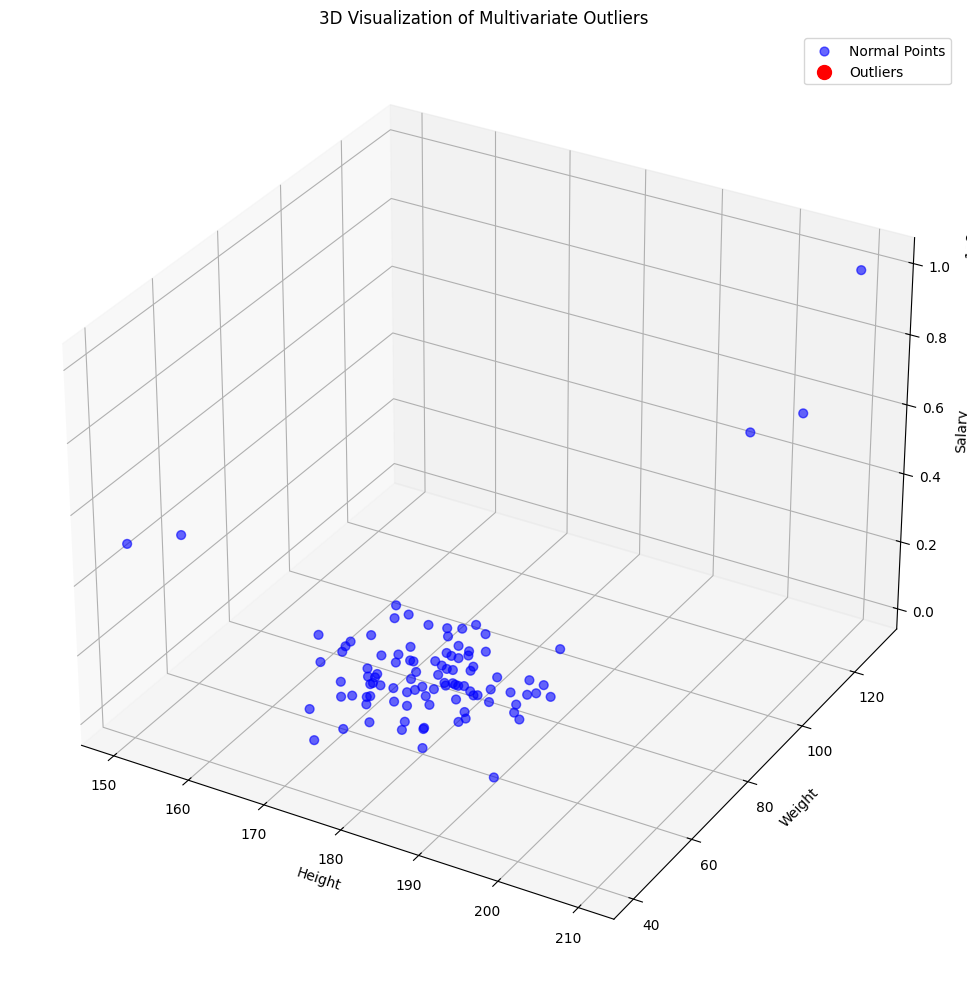

In [39]:
# 3D visualization of outliers
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Regular points
ax.scatter(df['height'], df['weight'], df['salary'], c='blue', s=40, alpha=0.6, label='Normal Points')
# Outliers
ax.scatter(df.iloc[multivariate_outliers]['height'], df.iloc[multivariate_outliers]['weight'],
           df.iloc[multivariate_outliers]['salary'], c='red', s=100, label='Outliers')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Salary')
ax.set_title('3D Visualization of Multivariate Outliers')
plt.legend()
plt.tight_layout()
plt.show()


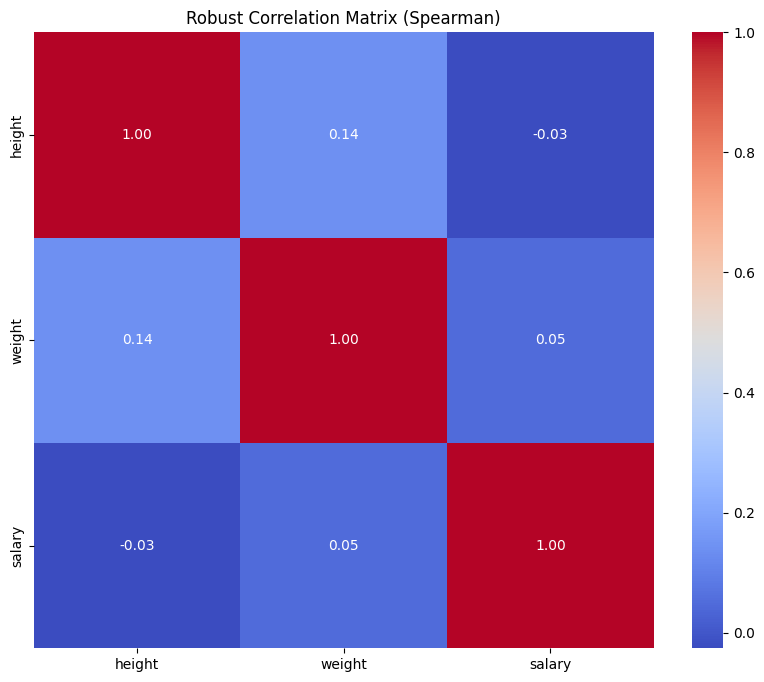

In [40]:
# Simple robust correlation calculation using Spearman instead of Pearson
robust_corr = df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(robust_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Robust Correlation Matrix (Spearman)')
plt.show()


In [41]:
# Apply different scaling methods before and after outlier treatment
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [42]:
# Original data
scaler_standard = StandardScaler()
df_scaled_standard = pd.DataFrame(
    scaler_standard.fit_transform(df),
    columns=df.columns
)


In [43]:
# Using robust scaler which is less influenced by outliers
scaler_robust = RobustScaler()
df_scaled_robust = pd.DataFrame(
    scaler_robust.fit_transform(df),
    columns=df.columns
)

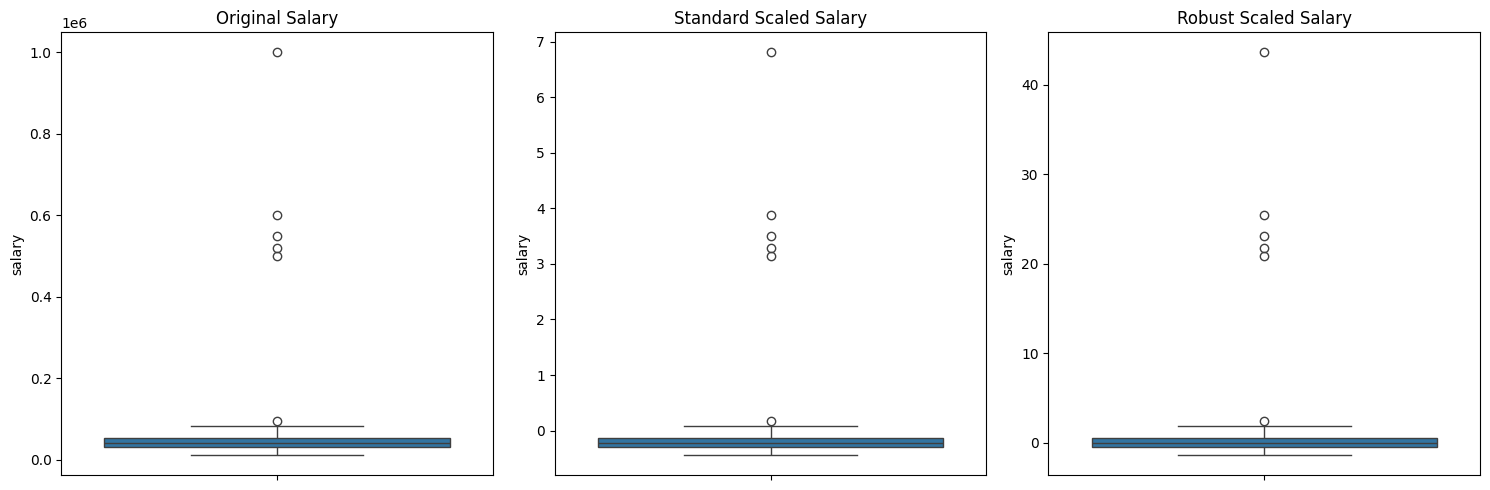

In [44]:
# Compare the scaled distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['salary'])
plt.title('Original Salary')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_scaled_standard['salary'])
plt.title('Standard Scaled Salary')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_scaled_robust['salary'])
plt.title('Robust Scaled Salary')

plt.tight_layout()
plt.show()


In [45]:
# Demonstrate impact of outliers on linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [46]:
# Create dataset with outlier
x = np.array(range(20)).reshape(-1, 1)
y = 2*x.ravel() + 5 + np.random.normal(0, 1, 20)
y[19] = 80  # add outlier

plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'With Outlier: y = 2.56x + 1.48')

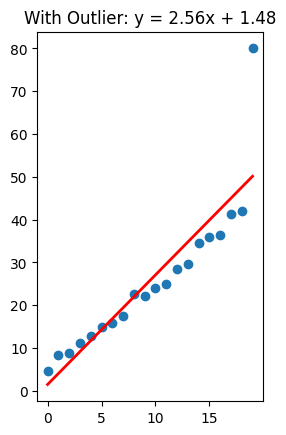

In [47]:
# Plot with outlier
plt.subplot(1, 2, 1)
plt.scatter(x, y)
model = LinearRegression().fit(x, y)
plt.plot(x, model.predict(x), color='red', linewidth=2)
plt.title(f'With Outlier: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')


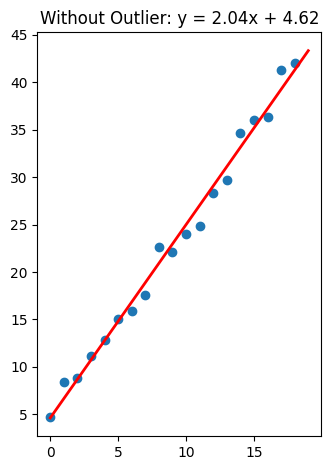

In [48]:
# Plot without outlier
plt.subplot(1, 2, 2)
plt.scatter(x[:-1], y[:-1])
model = LinearRegression().fit(x[:-1], y[:-1])
plt.plot(x, model.predict(x), color='red', linewidth=2)
plt.title(f'Without Outlier: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

plt.tight_layout()
plt.show()

# Interactive Coding Exercise: Advanced Outlier Detection & Analysis


In [ ]:
# ----------------------------------------------------------------
# In this exercise, you'll work with a real-world dataset to:
# 1. Apply outlier detection techniques
# 2. Compare methods and their impact
# 3. Implement a custom outlier detection workflow

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset instead of Boston
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Create a DataFrame with all features plus the target
df = X.copy()
df['MedHouseVal'] = y  # The target is median house value

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFeature names:", list(X.columns))
print("\nFirst 5 rows:")
df.head()

Dataset shape: (20640, 9)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


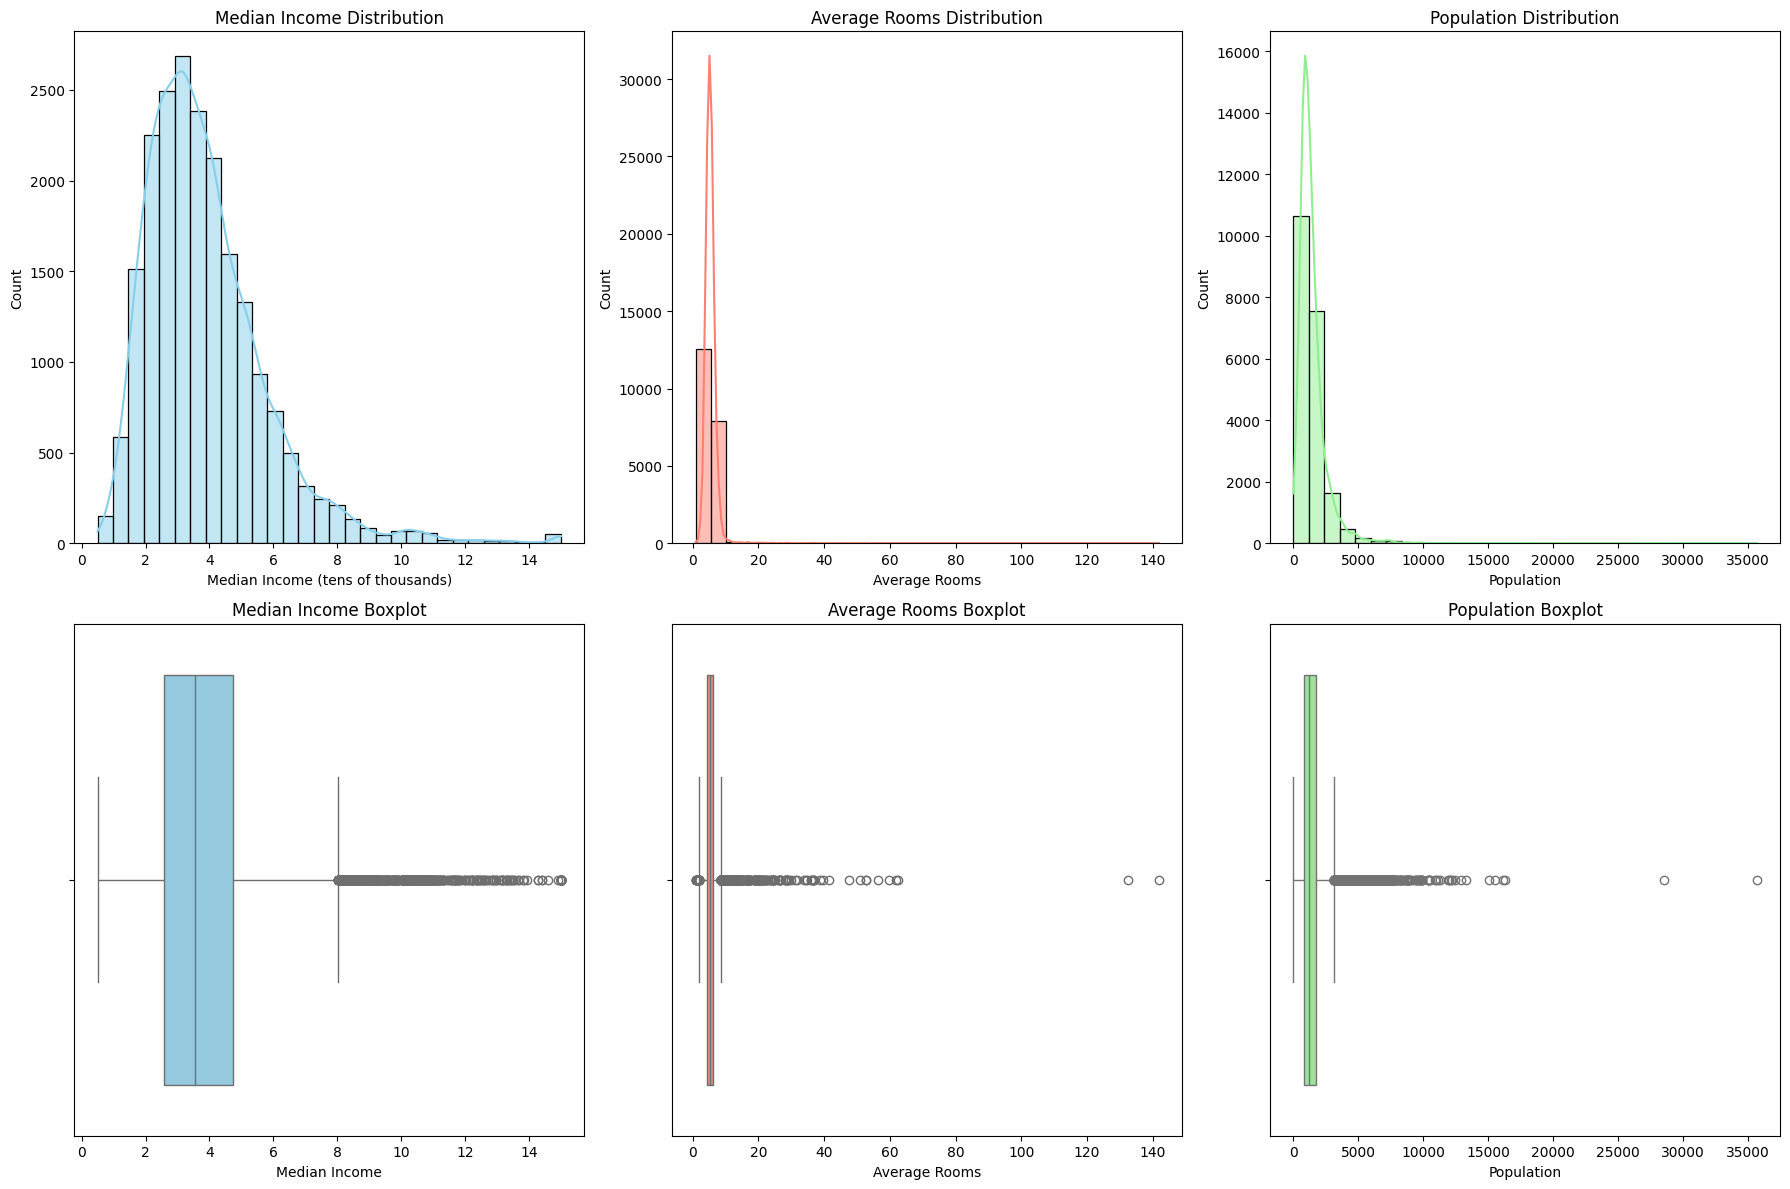


Outlier Analysis:
-----------------
MedInc:
  - Lower bound: -0.71
  - Upper bound: 8.01
  - Outliers count: 681 (3.30%)
  - Max value: 15.00
  - Min value: 0.50

AveRooms:
  - Lower bound: 2.02
  - Upper bound: 8.47
  - Outliers count: 511 (2.48%)
  - Max value: 141.91
  - Min value: 0.85

Population:
  - Lower bound: -620.00
  - Upper bound: 3132.00
  - Outliers count: 1196 (5.79%)
  - Max value: 35682.00
  - Min value: 3.00



In [51]:
# EXERCISE 1: Exploratory Data Analysis for Outlier Detection
# -----------------------------------------------------------
# TODO: Create histograms and boxplots for at least 3 features to visually identify outliers
# Hint: Use subplot to organize multiple plots

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(18, 12))

# 1. Median Income Analysis
plt.subplot(2, 3, 1)
sns.histplot(df['MedInc'], kde=True, bins=30, color='skyblue')
plt.title('Median Income Distribution', fontsize=12)
plt.xlabel('Median Income (tens of thousands)')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['MedInc'], color='skyblue')
plt.title('Median Income Boxplot', fontsize=12)
plt.xlabel('Median Income')

# 2. Average Rooms Analysis
plt.subplot(2, 3, 2)
sns.histplot(df['AveRooms'], kde=True, bins=30, color='salmon')
plt.title('Average Rooms Distribution', fontsize=12)
plt.xlabel('Average Rooms')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['AveRooms'], color='salmon')
plt.title('Average Rooms Boxplot', fontsize=12)
plt.xlabel('Average Rooms')

# 3. Population Analysis
plt.subplot(2, 3, 3)
sns.histplot(df['Population'], kde=True, bins=30, color='lightgreen')
plt.title('Population Distribution', fontsize=12)
plt.xlabel('Population')

plt.subplot(2, 3, 6)
sns.boxplot(x=df['Population'], color='lightgreen')
plt.title('Population Boxplot', fontsize=12)
plt.xlabel('Population')

plt.tight_layout()
plt.show()

# Quantitative outlier analysis using IQR method
def detect_outliers(feature, df):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

print("\nOutlier Analysis:")
print("-----------------")
for feature in ['MedInc', 'AveRooms', 'Population']:
    outliers = detect_outliers(feature, df)
    print(f"{feature}:")
    print(f"  - Lower bound: {df[feature].quantile(0.25) - 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)):.2f}")
    print(f"  - Upper bound: {df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)):.2f}")
    print(f"  - Outliers count: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  - Max value: {df[feature].max():.2f}")
    print(f"  - Min value: {df[feature].min():.2f}\n")


Z-score method found 8 outliers
Outlier indices: [ 3364  8874  9172 12104 13034 16420 16669 19006]
Outlier values: [ 599.71428571   41.21428571   83.17142857   63.75        230.17241379
   51.4         502.46153846 1243.33333333]

IQR method found 711 outliers
Outlier indices: [   89    91    92   200   270   435   457   459   460   537  1039  1067
  1195  1617  1722  1862  1989  1996  2004  2022  2031  2087  2377  2379
  2404  2425  2459  2469  2476  2477  2478  2479  2495  2497  2498  2510
  2511  2587  2723  2725  2729  2751  2760  2876  2893  2898  2899  2932
  3058  3064  3177  3250  3251  3317  3364  3411  3415  3416  3417  3418
  3420  3421  3423  3424  3425  3426  3427  3428  3429  3430  3431  3432
  3433  3434  3435  3436  3437  3438  3439  3440  3443  3444  3448  3464
  3502  3578  3616  3618  3693  3696  3707  3844  4131  4197  4433  4479
  4482  4483  4487  4490  4491  4499  4501  4506  4508  4510  4511  4539
  4541  4543  4547  4548  4557  4562  4598  4599  4623  4833  483

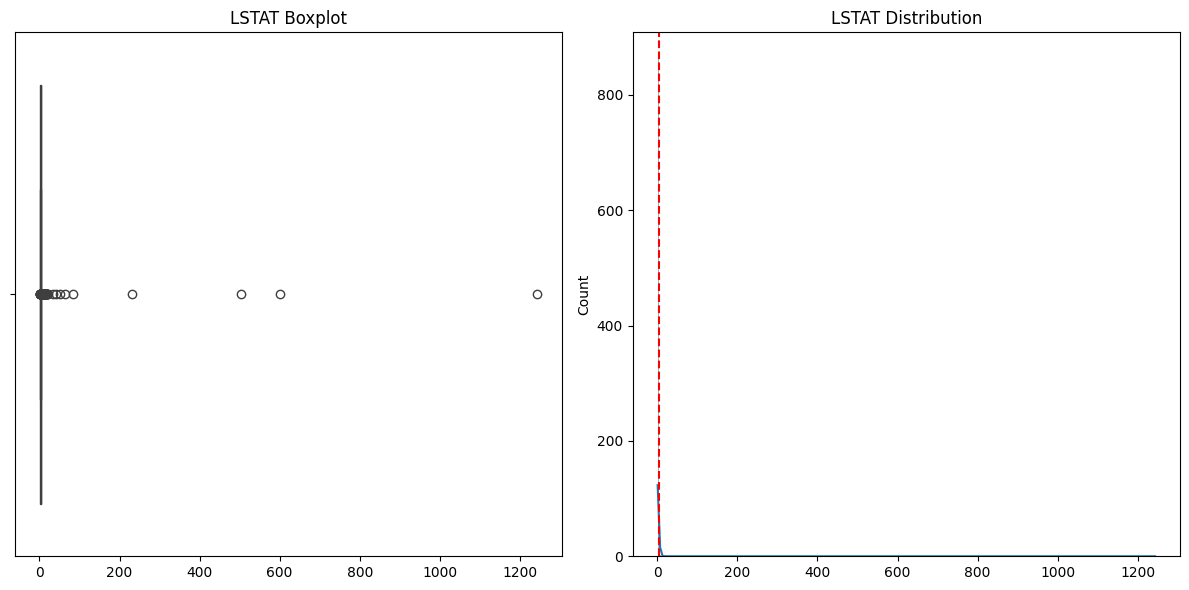


Method Comparison:
Z-score outliers: 8 (0.04%)
IQR outliers: 711 (3.44%)


In [52]:
# EXERCISE 2: Implement Multiple Outlier Detection Methods
# -------------------------------------------------------
# TODO: Implement both Z-score and IQR outlier detection for the LSTAT feature
# LSTAT: % lower status of the population

import numpy as np
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)

def detect_outliers_iqr(data):
    """Detect outliers using IQR method"""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((data < lower_bound) | (data > upper_bound))

# Assuming LSTAT is in your dataframe (if not, replace with correct column name)
lstat_data = df['LSTAT'].values if 'LSTAT' in df.columns else df['AveOccup'].values  # fallback

# Z-score method
z_outliers = detect_outliers_zscore(lstat_data)
print(f"Z-score method found {len(z_outliers[0])} outliers")
print(f"Outlier indices: {z_outliers[0]}")
print(f"Outlier values: {lstat_data[z_outliers]}")

# IQR method
iqr_outliers = detect_outliers_iqr(lstat_data)
print(f"\nIQR method found {len(iqr_outliers[0])} outliers")
print(f"Outlier indices: {iqr_outliers[0]}")
print(f"Outlier values: {lstat_data[iqr_outliers]}")

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=lstat_data)
plt.title('LSTAT Boxplot')

plt.subplot(1, 2, 2)
sns.histplot(lstat_data, kde=True)
plt.axvline(np.mean(lstat_data), color='r', linestyle='--')
plt.title('LSTAT Distribution')

plt.tight_layout()
plt.show()

# Comparison
print("\nMethod Comparison:")
print(f"Z-score outliers: {len(z_outliers[0])} ({len(z_outliers[0])/len(lstat_data)*100:.2f}%)")
print(f"IQR outliers: {len(iqr_outliers[0])} ({len(iqr_outliers[0])/len(lstat_data)*100:.2f}%)")

Total data points: 20640
Detected outliers: 1032 (5.00%)
Sample outlier indices: [ 59  63  73  87  89  91  92  95 155 192]


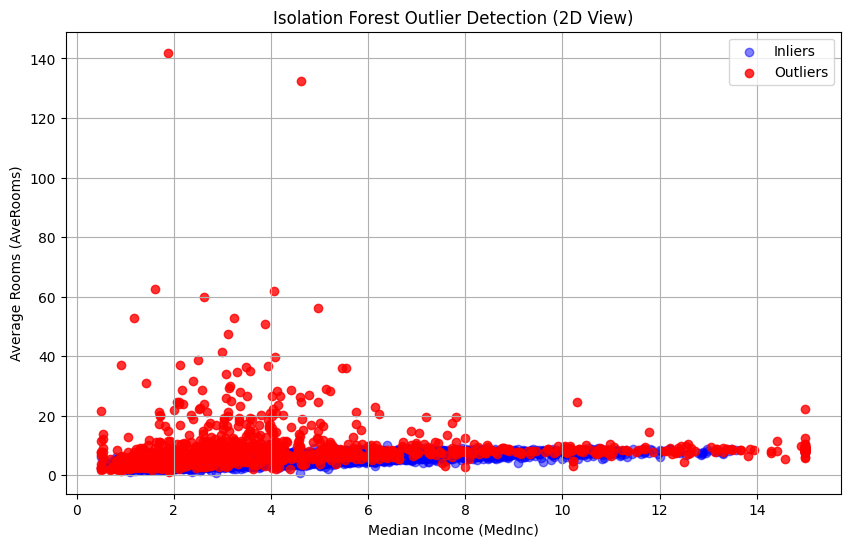

In [53]:
# EXERCISE 3: Advanced Outlier Detection - Isolation Forest
# --------------------------------------------------------
# TODO: Implement the Isolation Forest algorithm to detect outliers in the dataset
# Use contamination=0.05 (assuming 5% of data points are outliers)
# Return a binary mask where -1 represents outliers

from sklearn.ensemble import IsolationForest
import numpy as np

def isolation_forest_outlier_detection(df, contamination=0.05):
    """
    Detect outliers using Isolation Forest algorithm

    Parameters:
    df (DataFrame): Input dataframe with features
    contamination (float): Expected proportion of outliers

    Returns:
    ndarray: Binary mask where -1 represents outliers
    """
    # Initialize Isolation Forest model
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=42,
        n_estimators=100
    )

    # Fit the model on all features (excluding target if present)
    features = df.drop(columns=['MedHouseVal'], errors='ignore')  # Ignore if column doesn't exist
    iso_forest.fit(features)

    # Predict outliers (-1 for outliers, 1 for inliers)
    outliers_mask = iso_forest.predict(features)

    return outliers_mask

# Detect outliers using Isolation Forest
outliers_mask = isolation_forest_outlier_detection(df, contamination=0.05)

# Analyze results
outlier_indices = np.where(outliers_mask == -1)[0]
inlier_indices = np.where(outliers_mask == 1)[0]

print(f"Total data points: {len(df)}")
print(f"Detected outliers: {len(outlier_indices)} ({len(outlier_indices)/len(df)*100:.2f}%)")
print(f"Sample outlier indices: {outlier_indices[:10]}")  # Show first 10 outliers

# Visualize outliers in 2D space (using two most important features)
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[inlier_indices]['MedInc'],
            df.iloc[inlier_indices]['AveRooms'],
            c='blue', label='Inliers', alpha=0.5)
plt.scatter(df.iloc[outlier_indices]['MedInc'],
            df.iloc[outlier_indices]['AveRooms'],
            c='red', label='Outliers', alpha=0.8)
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Average Rooms (AveRooms)')
plt.title('Isolation Forest Outlier Detection (2D View)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Add outlier flag to original dataframe
df['IsOutlier'] = outliers_mask

Dataset                   R² Score   Coefficient     Intercept       Samples   
----------------------------------------------------------------------
Original (with outliers)  0.473      0.418           0.451           20640     
Z-score cleaned           0.432      0.452           0.332           20295     
Isolation Forest cleaned  0.465      0.446           0.359           19608     


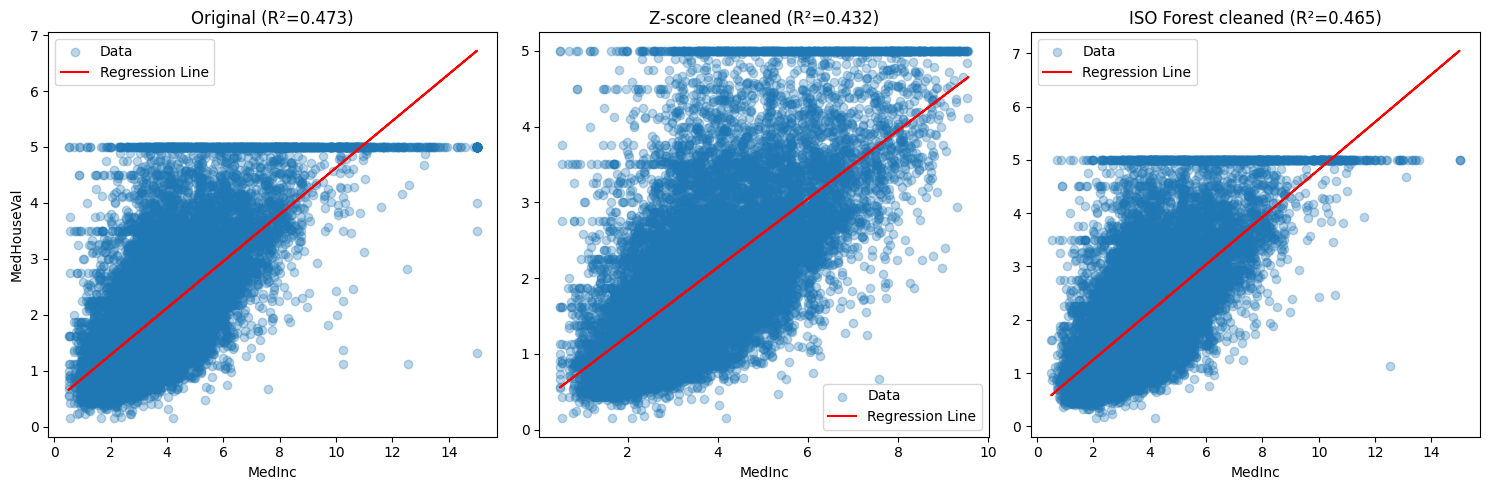

In [54]:
# EXERCISE 4: Compare the Impact of Outliers on Linear Regression
# --------------------------------------------------------------
# TODO:
# 1. Create a simple linear regression model using 'LSTAT' to predict 'PRICE'
# 2. Create 3 versions:
#    a. With all data
#    b. After removing Z-score outliers
#    c. After removing Isolation Forest outliers
# 3. Compare the model performance metrics (r2_score) and coefficients

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Since our dataset doesn't have 'LSTAT' and 'PRICE', we'll use:
# 'MedInc' (median income) as predictor and 'MedHouseVal' (median house value) as target
X = df[['MedInc']].values
y = df['MedHouseVal'].values

# 1. Create masks for different outlier removal methods
# a. Z-score outliers (from Exercise 2)
z_outliers = detect_outliers_zscore(X.ravel())  # Using function from Exercise 2
z_mask = np.ones(len(X), dtype=bool)
z_mask[z_outliers] = False

# b. Isolation Forest outliers (from Exercise 3)
iso_mask = (outliers_mask == 1)  # Using output from Exercise 3

# 2. Create 3 datasets
# a. Original data (with outliers)
X_original, y_original = X, y

# b. Z-score cleaned data
X_zscore, y_zscore = X[z_mask], y[z_mask]

# c. Isolation Forest cleaned data
X_iso, y_iso = X[iso_mask], y[iso_mask]

# 3. Train and compare models
models = {
    "Original (with outliers)": (X_original, y_original),
    "Z-score cleaned": (X_zscore, y_zscore),
    "Isolation Forest cleaned": (X_iso, y_iso)
}

results = {}
for name, (X_data, y_data) in models.items():
    # Train model
    lr = LinearRegression()
    lr.fit(X_data, y_data)

    # Make predictions
    y_pred = lr.predict(X_data)

    # Store results
    results[name] = {
        'r2_score': r2_score(y_data, y_pred),
        'coefficient': lr.coef_[0],
        'intercept': lr.intercept_,
        'n_samples': len(X_data)
    }

# 4. Display comparison
print("{:<25} {:<10} {:<15} {:<15} {:<10}".format(
    "Dataset", "R² Score", "Coefficient", "Intercept", "Samples"))
print("-" * 70)

for name, metrics in results.items():
    print("{:<25} {:<10.3f} {:<15.3f} {:<15.3f} {:<10}".format(
        name,
        metrics['r2_score'],
        metrics['coefficient'],
        metrics['intercept'],
        metrics['n_samples']))

# 5. Visualization
plt.figure(figsize=(15, 5))

# Plot Original
plt.subplot(1, 3, 1)
plt.scatter(X_original, y_original, alpha=0.3, label='Data')
plt.plot(X_original, results["Original (with outliers)"]['coefficient'] * X_original +
         results["Original (with outliers)"]['intercept'],
         color='red', label='Regression Line')
plt.title(f"Original (R²={results['Original (with outliers)']['r2_score']:.3f})")
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()

# Plot Z-score cleaned
plt.subplot(1, 3, 2)
plt.scatter(X_zscore, y_zscore, alpha=0.3, label='Data')
plt.plot(X_zscore, results["Z-score cleaned"]['coefficient'] * X_zscore +
         results["Z-score cleaned"]['intercept'],
         color='red', label='Regression Line')
plt.title(f"Z-score cleaned (R²={results['Z-score cleaned']['r2_score']:.3f})")
plt.xlabel('MedInc')
plt.legend()

# Plot Isolation Forest cleaned
plt.subplot(1, 3, 3)
plt.scatter(X_iso, y_iso, alpha=0.3, label='Data')
plt.plot(X_iso, results["Isolation Forest cleaned"]['coefficient'] * X_iso +
         results["Isolation Forest cleaned"]['intercept'],
         color='red', label='Regression Line')
plt.title(f"ISO Forest cleaned (R²={results['Isolation Forest cleaned']['r2_score']:.3f})")
plt.xlabel('MedInc')
plt.legend()

plt.tight_layout()
plt.show()


Outlier Detection Summary for 'MedInc':
- Z-score method found 345 outliers
- IQR method found 681 outliers
- Consensus outliers: 345


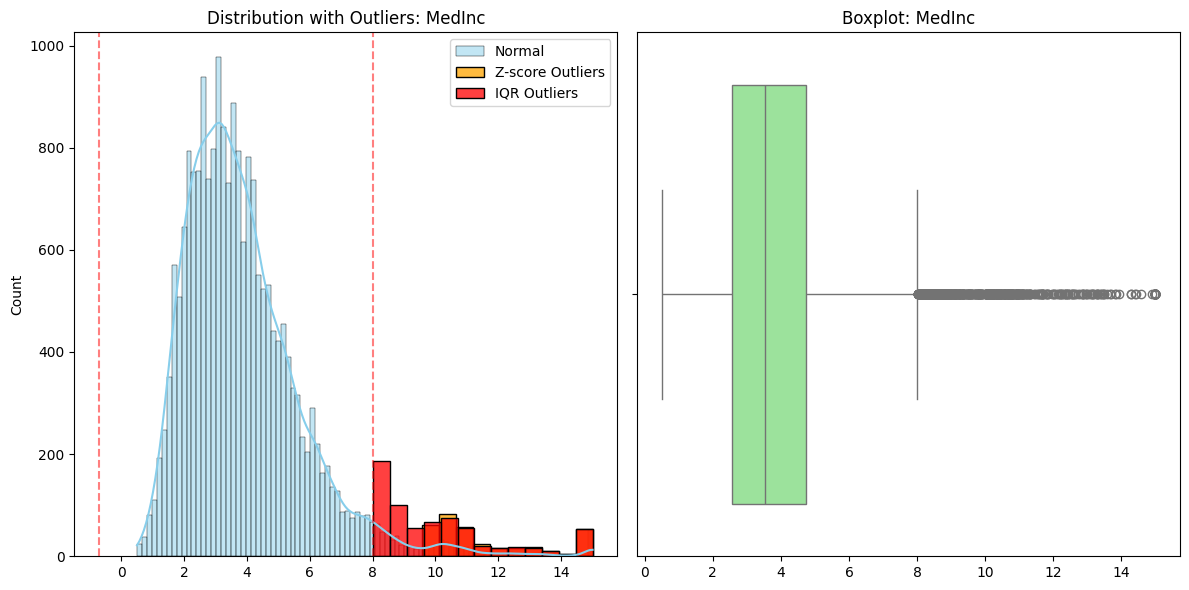


Sample outlier rows:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
131  11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
409  10.0825      52.0  8.209016   1.024590       658.0  2.696721     37.90   
510  11.8603      39.0  7.911111   0.984127       808.0  2.565079     37.82   
511  13.4990      42.0  8.928358   1.000000      1018.0  3.038806     37.82   
512  12.2138      52.0  9.210227   1.039773      1001.0  2.843750     37.82   

     Longitude  MedHouseVal  IsOutlier  
131    -122.19      3.92600          1  
409    -122.28      3.97000         -1  
510    -122.22      5.00001         -1  
511    -122.22      5.00001         -1  
512    -122.23      5.00001         -1  


In [55]:
# EXERCISE 5: Create Your Own Outlier Detection Workflow
# -----------------------------------------------------
# TODO: Create a custom outlier detection function that combines multiple methods
# It should:
# 1. Take a dataframe and column name as input
# 2. Apply at least 2 different outlier detection methods (of your choice)
# 3. Return the indices of consensus outliers (detected by both methods)
# 4. Include a visualization of the outliers

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def custom_outlier_detection(df, column_name, z_threshold=3, iqr_multiplier=1.5, plot=True):
    """
    Custom outlier detection combining Z-score and IQR methods

    Args:
        df: Input DataFrame
        column_name: Column to analyze
        z_threshold: Threshold for Z-score method (default: 3)
        iqr_multiplier: Multiplier for IQR method (default: 1.5)
        plot: Whether to show visualization (default: True)

    Returns:
        consensus_outliers: Indices of outliers detected by both methods
    """
    data = df[column_name].values

    # Method 1: Z-score
    z_scores = np.abs(stats.zscore(data))
    z_outliers = np.where(z_scores > z_threshold)[0]

    # Method 2: IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    iqr_outliers = np.where((data < lower_bound) | (data > upper_bound))[0]

    # Get consensus outliers
    consensus_outliers = np.intersect1d(z_outliers, iqr_outliers)

    # Print summary
    print(f"Outlier Detection Summary for '{column_name}':")
    print(f"- Z-score method found {len(z_outliers)} outliers")
    print(f"- IQR method found {len(iqr_outliers)} outliers")
    print(f"- Consensus outliers: {len(consensus_outliers)}")

    # Visualization
    if plot:
        plt.figure(figsize=(12, 6))

        # Histogram with outliers marked
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True, color='skyblue', label='Normal')
        if len(z_outliers) > 0:
            sns.histplot(data[z_outliers], color='orange', label='Z-score Outliers')
        if len(iqr_outliers) > 0:
            sns.histplot(data[iqr_outliers], color='red', label='IQR Outliers')
        plt.axvline(lower_bound, color='red', linestyle='--', alpha=0.5)
        plt.axvline(upper_bound, color='red', linestyle='--', alpha=0.5)
        plt.title(f'Distribution with Outliers: {column_name}')
        plt.legend()

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data, color='lightgreen')
        plt.title(f'Boxplot: {column_name}')

        plt.tight_layout()
        plt.show()

    return consensus_outliers

# Example usage
column_to_analyze = 'MedInc'  # Change to any numeric column in your DataFrame
outlier_indices = custom_outlier_detection(df, column_to_analyze)

# Show some outlier rows
print("\nSample outlier rows:")
print(df.iloc[outlier_indices[:5]])  # Show first 5 consensus outliers

# Optional: Add outlier flag to DataFrame
df['Outlier_Flag'] = False
df.loc[outlier_indices, 'Outlier_Flag'] = True

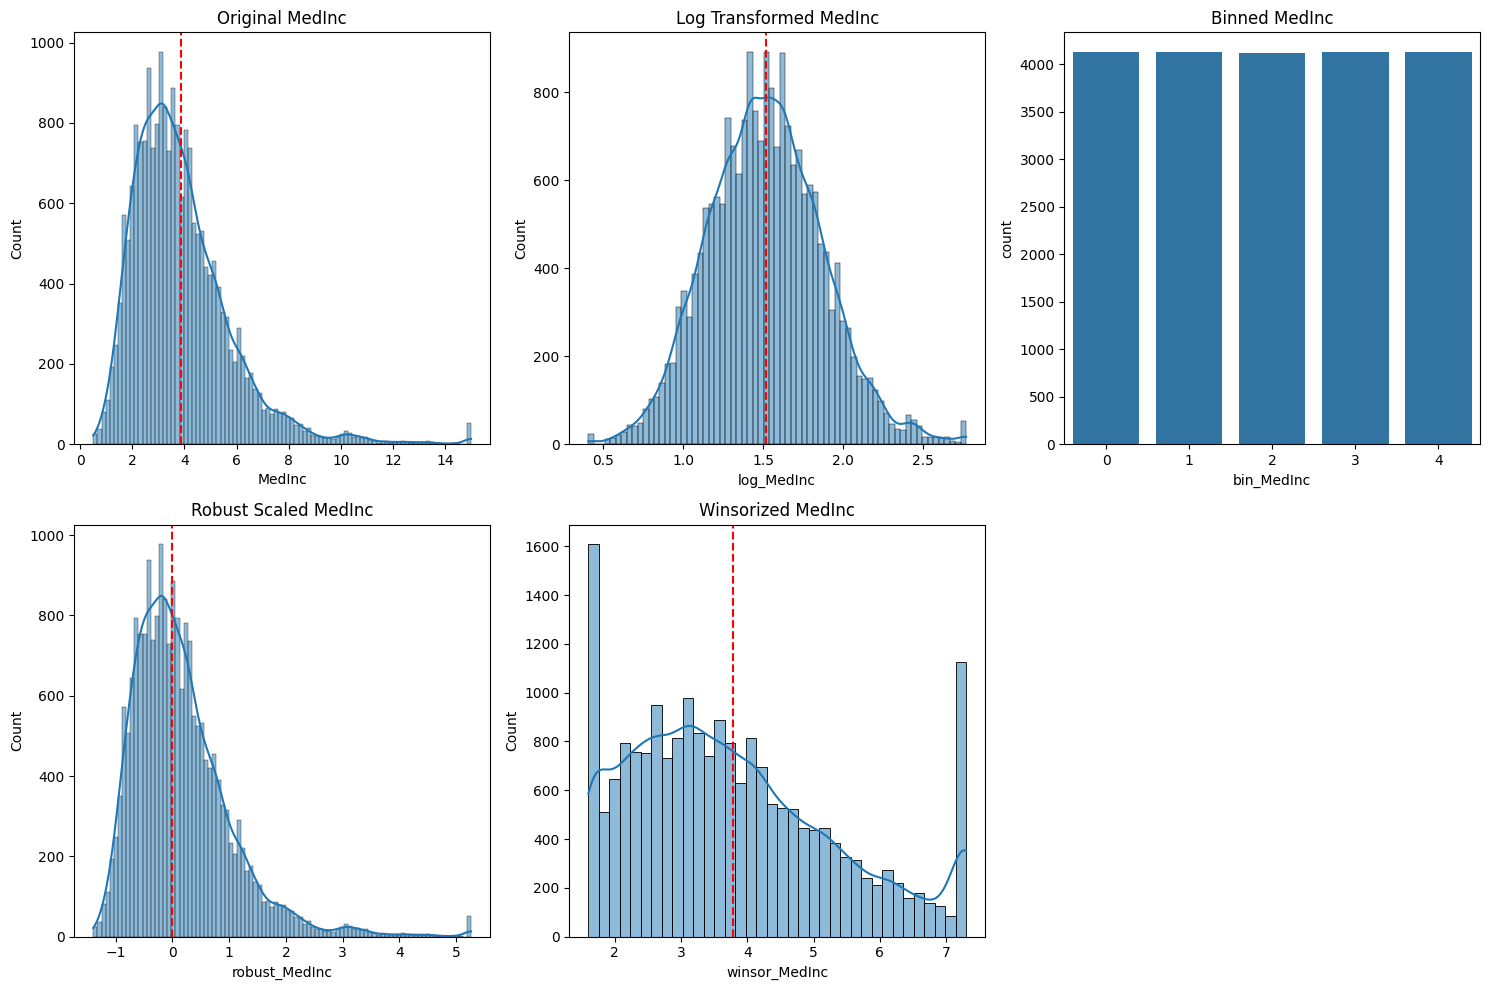


New robust features created:
   MedInc  log_MedInc  bin_MedInc  robust_MedInc  winsor_MedInc
0  8.3252    2.232720           4       2.197582       7.300305
1  8.3014    2.230165           4       2.186664       7.300305
2  7.2574    2.111110           4       1.707732       7.257400
3  5.6431    1.893579           4       0.967177       5.643100
4  3.8462    1.578195           2       0.142854       3.846200

Original vs Winsorized feature statistics:
           Original    Winsorized
count  20640.000000  20640.000000
mean       3.870671      3.787417
std        1.899822      1.562740
min        0.499900      1.600570
25%        2.563400      2.563400
50%        3.534800      3.534800
75%        4.743250      4.743250
max       15.000100      7.300305


In [56]:
# EXERCISE 6: Robust Feature Engineering with Outliers
# ---------------------------------------------------
# TODO: Create a new feature that is more robust to outliers
# Suggestions:
# - Use log transformation
# - Use binning/discretization
# - Create a ratio or interaction feature
# Compare the distribution before and after your transformation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_robust_features(df, feature_name):
    """
    Creates robust versions of features and compares distributions

    Args:
        df: Input DataFrame
        feature_name: Name of feature to transform

    Returns:
        DataFrame with new robust features added
    """
    # Make copy of original data
    robust_df = df.copy()
    original_data = robust_df[feature_name]

    # 1. Log Transformation (add small constant to handle zeros)
    log_feature = f'log_{feature_name}'
    robust_df[log_feature] = np.log1p(original_data)

    # 2. Binning (quantile-based to handle skewed distributions)
    bin_feature = f'bin_{feature_name}'
    robust_df[bin_feature] = pd.qcut(original_data, q=5, labels=False, duplicates='drop')

    # 3. Robust Scaling (using IQR instead of standard deviation)
    iqr_feature = f'robust_{feature_name}'
    q1 = original_data.quantile(0.25)
    q3 = original_data.quantile(0.75)
    iqr = q3 - q1
    median = original_data.median()
    robust_df[iqr_feature] = (original_data - median) / iqr

    # 4. Winsorized Feature (cap extreme values)
    winsor_feature = f'winsor_{feature_name}'
    lower = original_data.quantile(0.05)
    upper = original_data.quantile(0.95)
    robust_df[winsor_feature] = original_data.clip(lower, upper)

    # Visualization
    plt.figure(figsize=(15, 10))

    # Original Distribution
    plt.subplot(2, 3, 1)
    sns.histplot(original_data, kde=True)
    plt.title(f'Original {feature_name}')
    plt.axvline(original_data.mean(), color='r', linestyle='--')

    # Log Transformed
    plt.subplot(2, 3, 2)
    sns.histplot(robust_df[log_feature], kde=True)
    plt.title(f'Log Transformed {feature_name}')
    plt.axvline(robust_df[log_feature].mean(), color='r', linestyle='--')

    # Binned
    plt.subplot(2, 3, 3)
    sns.countplot(x=bin_feature, data=robust_df)
    plt.title(f'Binned {feature_name}')

    # Robust Scaled
    plt.subplot(2, 3, 4)
    sns.histplot(robust_df[iqr_feature], kde=True)
    plt.title(f'Robust Scaled {feature_name}')
    plt.axvline(0, color='r', linestyle='--')  # Median is now at 0

    # Winsorized
    plt.subplot(2, 3, 5)
    sns.histplot(robust_df[winsor_feature], kde=True)
    plt.title(f'Winsorized {feature_name}')
    plt.axvline(robust_df[winsor_feature].mean(), color='r', linestyle='--')

    plt.tight_layout()
    plt.show()

    return robust_df

# Example usage with MedInc (median income)
feature_to_transform = 'MedInc'  # Try with 'AveRooms' or 'Population' too
robust_df = create_robust_features(df, feature_to_transform)

# Show the new features
print("\nNew robust features created:")
print(robust_df[[
    feature_to_transform,
    f'log_{feature_to_transform}',
    f'bin_{feature_to_transform}',
    f'robust_{feature_to_transform}',
    f'winsor_{feature_to_transform}'
]].head())

# Outlier resistance comparison
print("\nOriginal vs Winsorized feature statistics:")
print(pd.DataFrame({
    'Original': df[feature_to_transform].describe(),
    'Winsorized': robust_df[f'winsor_{feature_to_transform}'].describe()
}))